In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("pastel")

df_features = pd.read_csv('training_set_features.csv')
df_labels = pd.read_csv('training_set_labels.csv')

In [2]:
#we can merge the two dataframes on the 'respondent_id' column
df = pd.merge(df_features, df_labels, on='respondent_id')
# 根据接种疫苗的情况，分为四类，分别是：1. H1N1 vaccine 2. seasonal vaccine 3. both 4. neither
df['vaccine'] = df['h1n1_vaccine'] + df['seasonal_vaccine'] * 2
df['vaccination_status'] = df['vaccine'].map({0: 'neither', 1: 'h1n1 only', 2: 'seasonal only', 3: 'both'})
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,vaccine,vaccination_status
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0,neither
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1,2,seasonal only
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0,0,neither
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1,2,seasonal only
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0,0,neither
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0,0,neither
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0,0,neither
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1,2,seasonal only
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0,0,neither


<Axes: xlabel='vaccination_status', ylabel='count'>

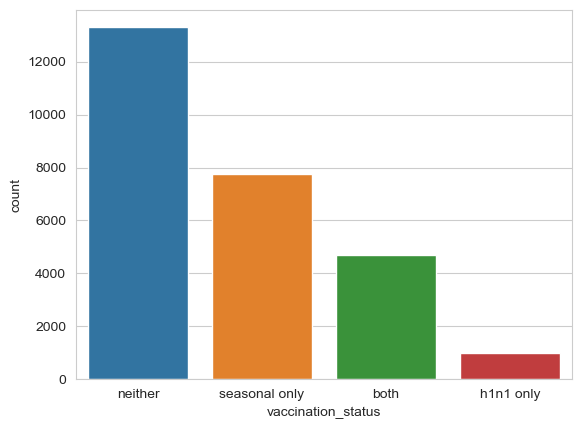

In [3]:
# 画出接种疫苗情况的柱状图
sns.countplot(data=df, x='vaccination_status')

<Axes: xlabel='vaccination_status', ylabel='count'>

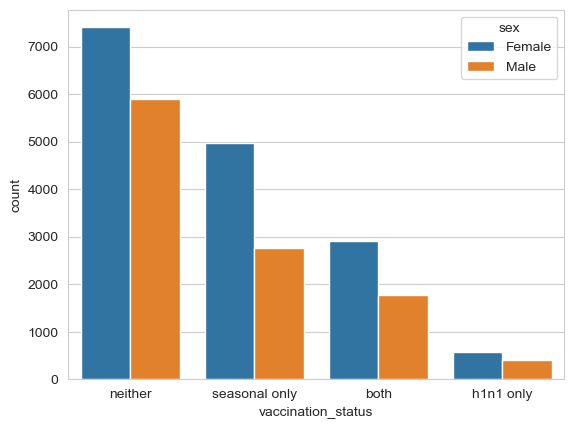

In [4]:
# 根据性别，画出接种疫苗情况的柱状图
sns.countplot(data=df, x='vaccination_status', hue='sex')

<Axes: xlabel='sex', ylabel='count'>

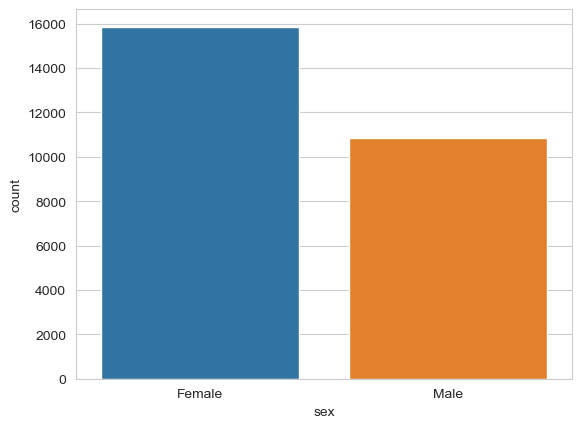

In [5]:
# 画出图中男女的比例
sns.countplot(data=df, x='sex')

<Axes: xlabel='age_group', ylabel='count'>

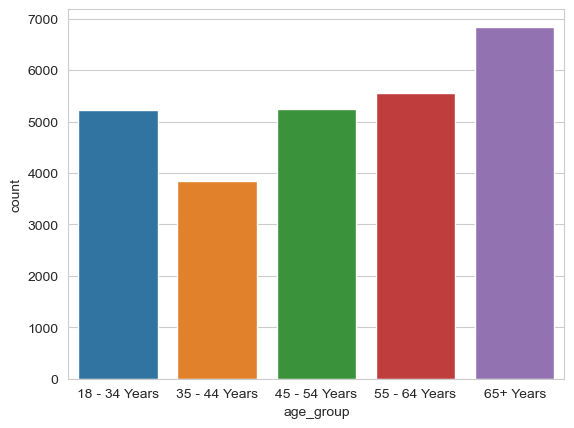

In [6]:
# 画出每个年龄段的人数
sns.countplot(data=df, x='age_group',order=['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'])

mkdir: ./data: File exists


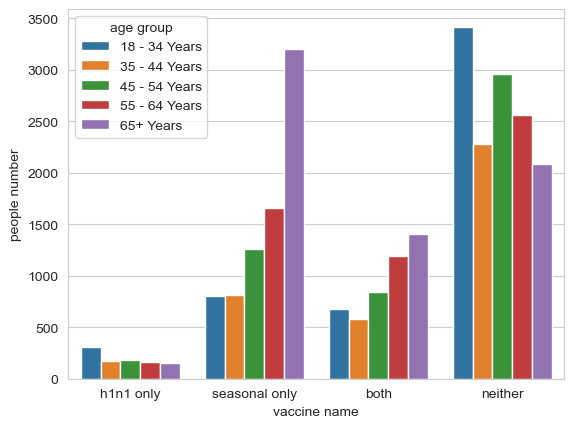

In [7]:
# 根据年龄，画出接种疫苗情况的柱状图, 按h1n1, seasonal, both, neither的顺序画, hue排序为age_group
hue_order = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
sns.countplot(data=df, x='vaccination_status', hue='age_group', hue_order=hue_order, order=['h1n1 only', 'seasonal only', 'both', 'neither'])
plt.legend(title='age group')
plt.xlabel('vaccine name')
plt.ylabel('people number')
# 保存图片
!mkdir ./data
plt.savefig('./data/vaccination_status_and_count.png')

<Axes: xlabel='education', ylabel='count'>

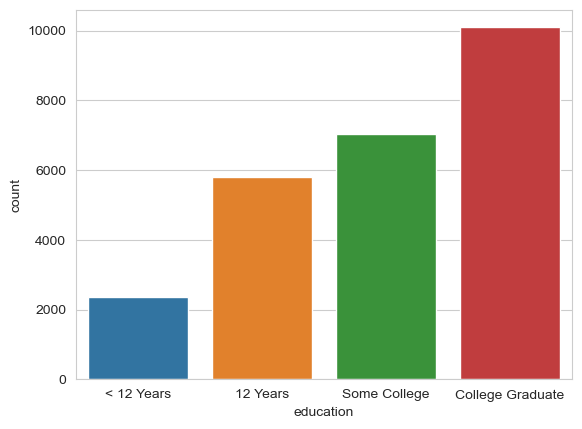

In [8]:
# 画出每种教育程度的人数
sns.countplot(data=df, x='education', order=['< 12 Years', '12 Years', 'Some College', 'College Graduate'])

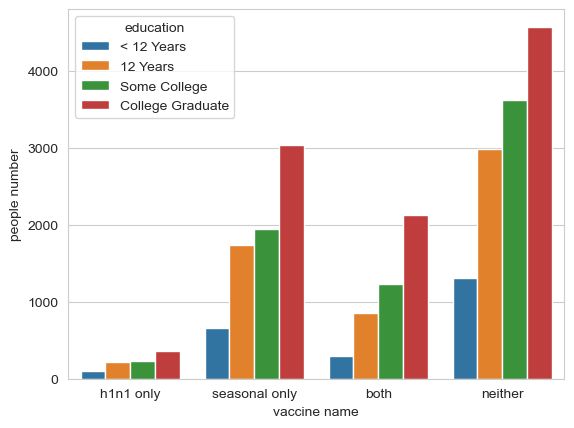

In [9]:
# 根据受教育程度，画出接种疫苗情况的柱状图，按h1n1, seasonal, both, neither的顺序画, hue排序为education
hue_order = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
sns.countplot(data=df, x='vaccination_status', hue='education', hue_order=hue_order, order=['h1n1 only', 'seasonal only', 'both', 'neither'])
plt.legend(title='education')
plt.xlabel('vaccine name')
plt.ylabel('people number')
# 保存图片
plt.savefig('./data/vaccination_status_and_education.png')

<Axes: xlabel='race', ylabel='count'>

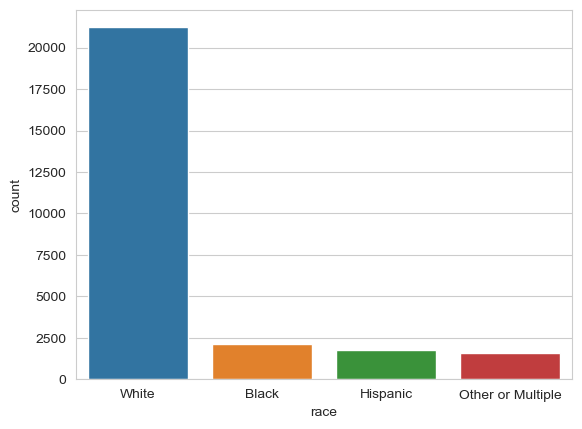

In [10]:
# 画出每种种族的人数
sns.countplot(data=df, x='race', order=['White', 'Black', 'Hispanic', 'Other or Multiple'])

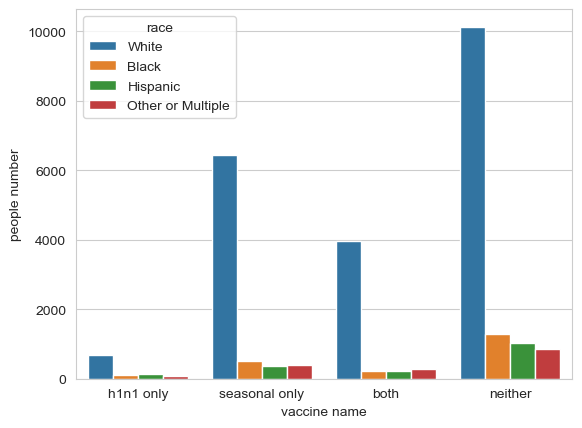

In [11]:
# 根据种族，画出接种疫苗情况的柱状图，按h1n1, seasonal, both, neither的顺序画, hue排序为race
hue_order = ['White', 'Black', 'Hispanic', 'Other or Multiple']
sns.countplot(data=df, x='vaccination_status', hue='race', hue_order=hue_order, order=['h1n1 only', 'seasonal only', 'both', 'neither'])
plt.legend(title='race')
plt.xlabel('vaccine name')
plt.ylabel('people number')
# 保存图片
plt.savefig('./data/vaccination_status_and_race.png')

<Axes: xlabel='income_poverty', ylabel='count'>

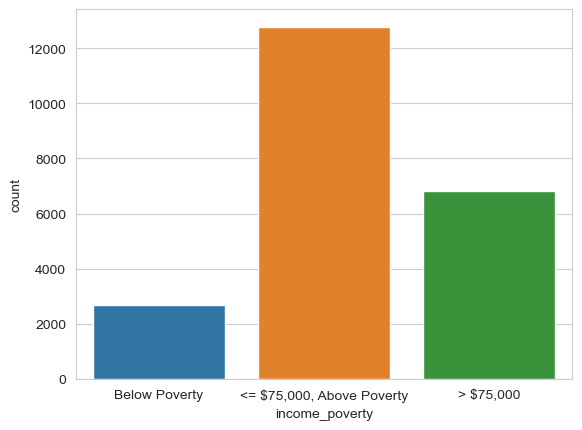

In [12]:
# 画出每种收入的人数
sns.countplot(data=df, x='income_poverty', order=['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'])

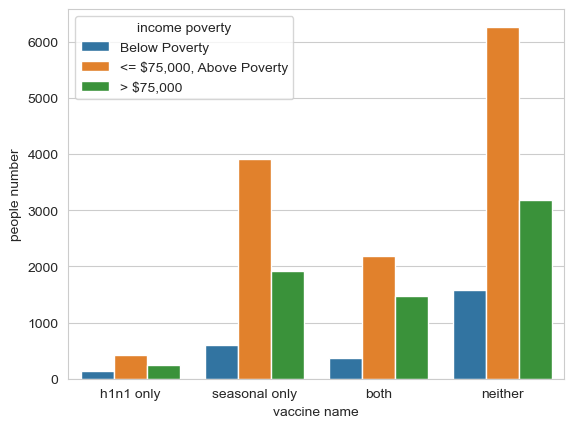

In [13]:
# 根据收入，画出接种疫苗情况的柱状图，按h1n1, seasonal, both, neither的顺序画, hue排序为income_poverty
hue_order = ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000']
sns.countplot(data=df, x='vaccination_status', hue='income_poverty', hue_order=hue_order, order=['h1n1 only', 'seasonal only', 'both', 'neither'])
plt.legend(title='income poverty')
plt.xlabel('vaccine name')
plt.ylabel('people number')
# 保存图片
plt.savefig('./data/vaccination_status_and_income_poverty.png')

<Axes: xlabel='marital_status', ylabel='count'>

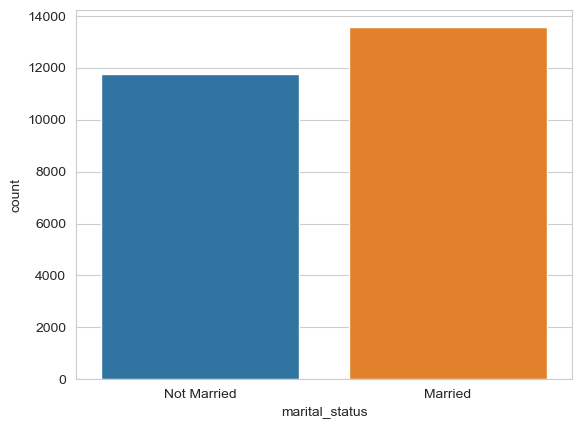

In [14]:
# 画出每种婚姻状况的人数
sns.countplot(data=df, x='marital_status', order=['Not Married', 'Married'])

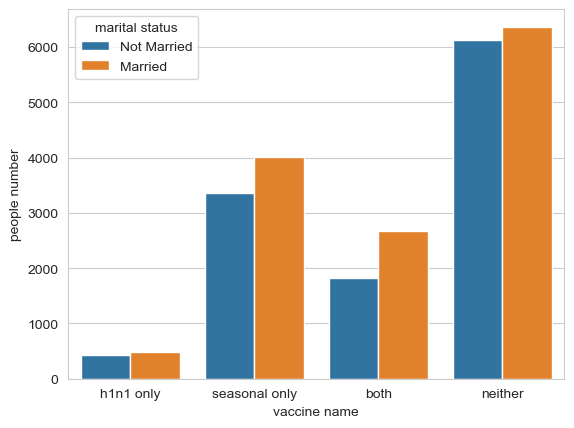

In [15]:
# 根据婚姻状况，画出接种疫苗情况的柱状图，按h1n1, seasonal, both, neither的顺序画, hue排序为marital_status
hue_order = ['Not Married', 'Married']
sns.countplot(data=df, x='vaccination_status', hue='marital_status', hue_order=hue_order, order=['h1n1 only', 'seasonal only', 'both', 'neither'])
plt.legend(title='marital status')
plt.xlabel('vaccine name')
plt.ylabel('people number')
# 保存图片
plt.savefig('./data/vaccination_status_and_marital_status.png')

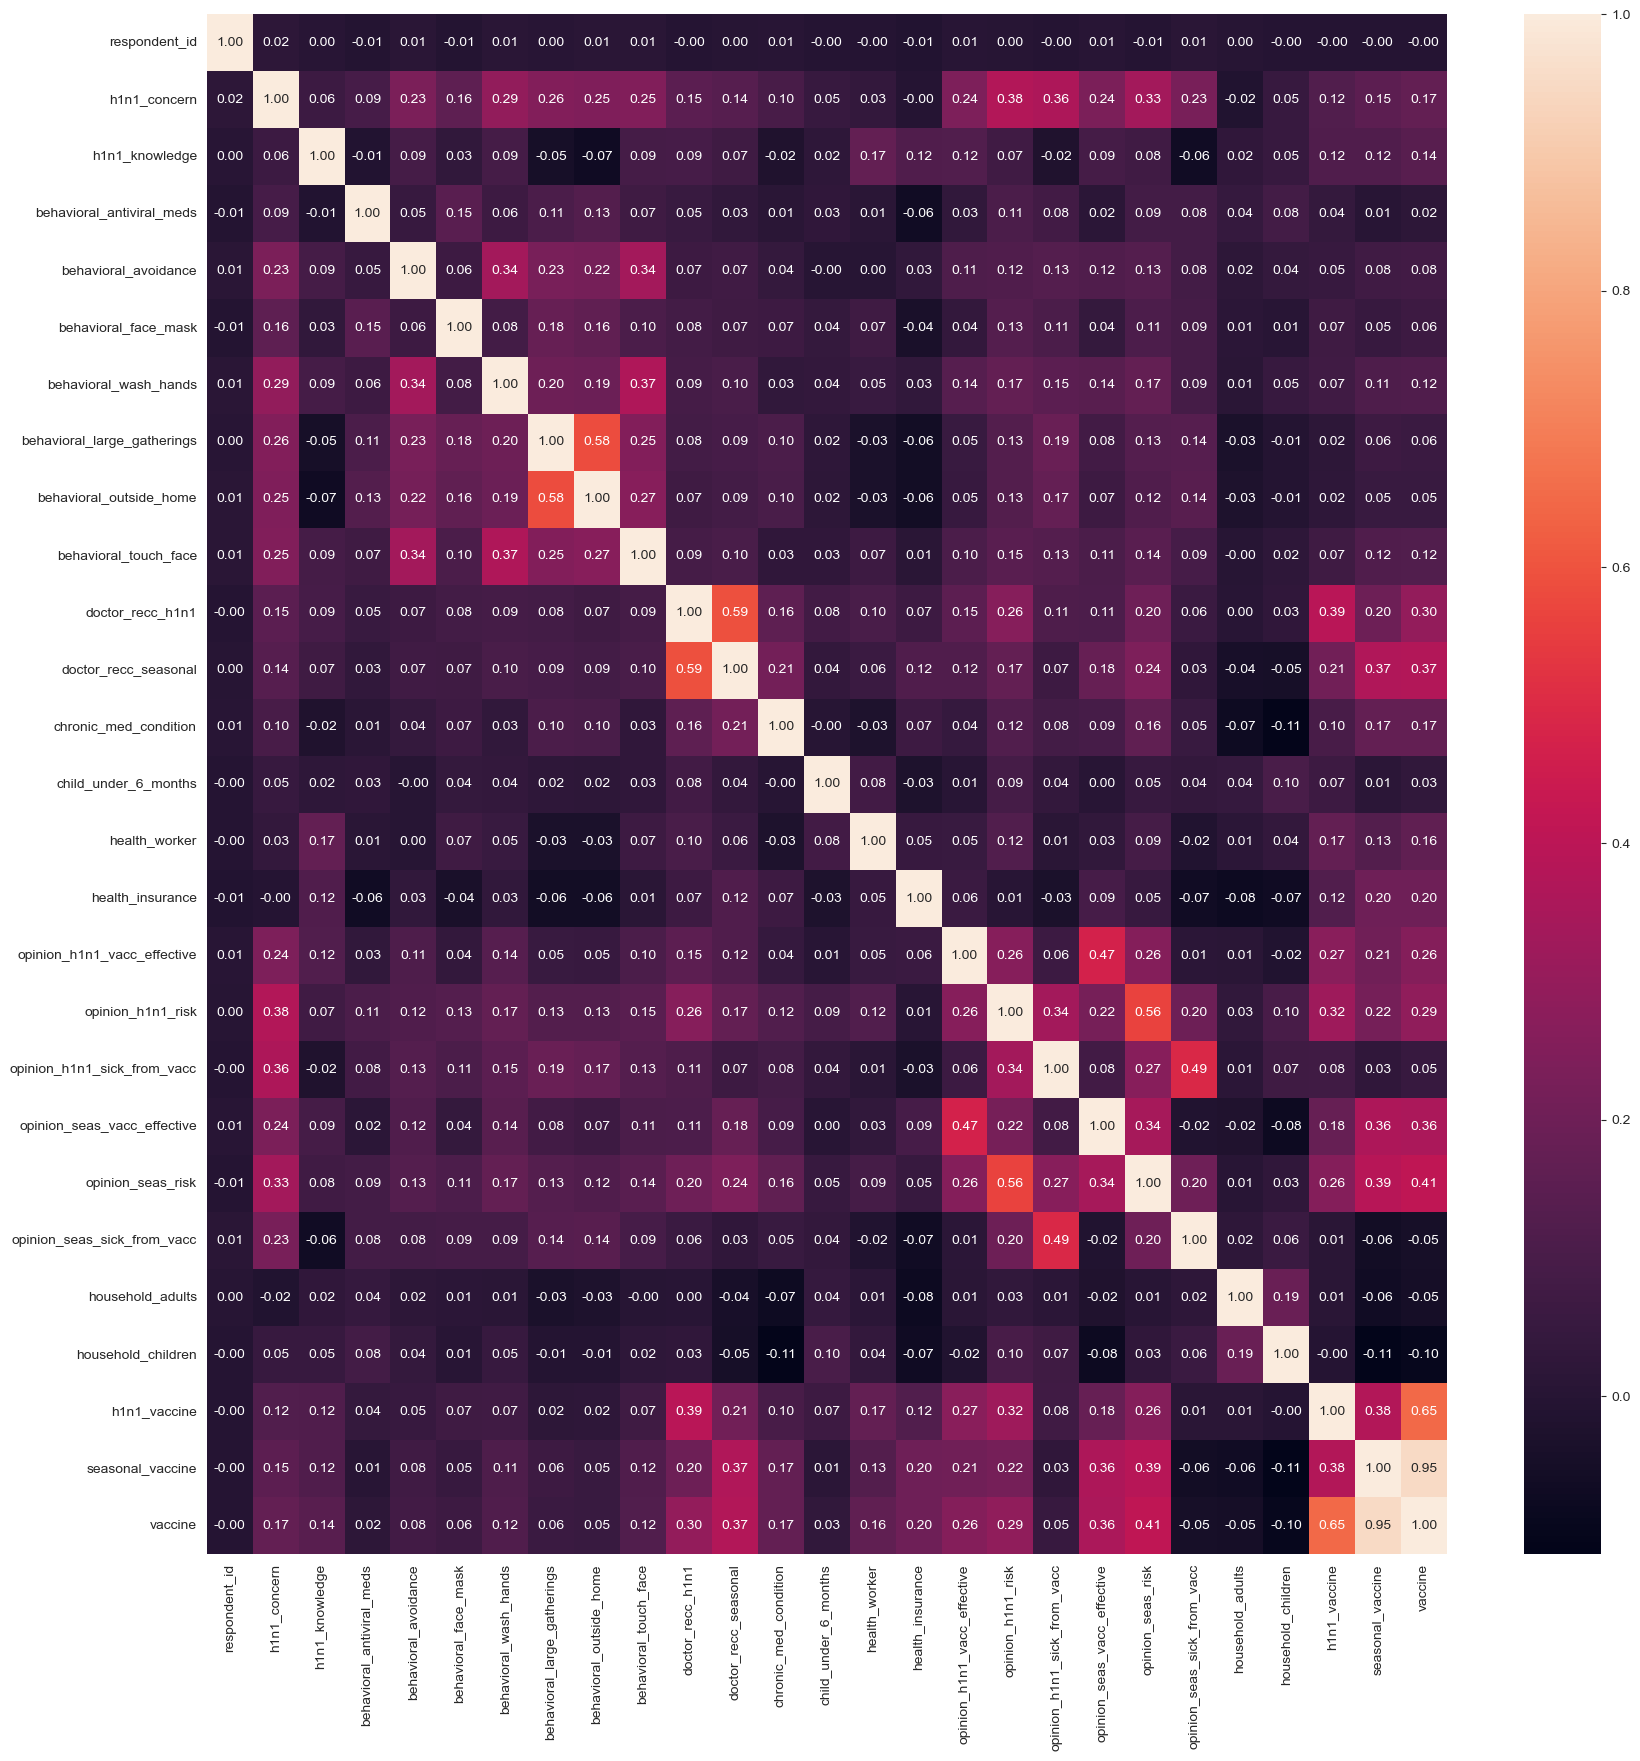

In [16]:
# 画出热图，查看各个特征之间的相关性
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f')
# 保存图片
plt.savefig('./data/corr.png')

array([[<Axes: title={'center': 'h1n1_concern'}>,
        <Axes: title={'center': 'h1n1_knowledge'}>,
        <Axes: title={'center': 'behavioral_antiviral_meds'}>,
        <Axes: title={'center': 'behavioral_avoidance'}>,
        <Axes: title={'center': 'behavioral_face_mask'}>],
       [<Axes: title={'center': 'behavioral_wash_hands'}>,
        <Axes: title={'center': 'behavioral_large_gatherings'}>,
        <Axes: title={'center': 'behavioral_outside_home'}>,
        <Axes: title={'center': 'behavioral_touch_face'}>,
        <Axes: title={'center': 'doctor_recc_h1n1'}>],
       [<Axes: title={'center': 'doctor_recc_seasonal'}>,
        <Axes: title={'center': 'chronic_med_condition'}>,
        <Axes: title={'center': 'child_under_6_months'}>,
        <Axes: title={'center': 'health_worker'}>,
        <Axes: title={'center': 'health_insurance'}>],
       [<Axes: title={'center': 'opinion_h1n1_vacc_effective'}>,
        <Axes: title={'center': 'opinion_h1n1_risk'}>,
        <Axes: tit

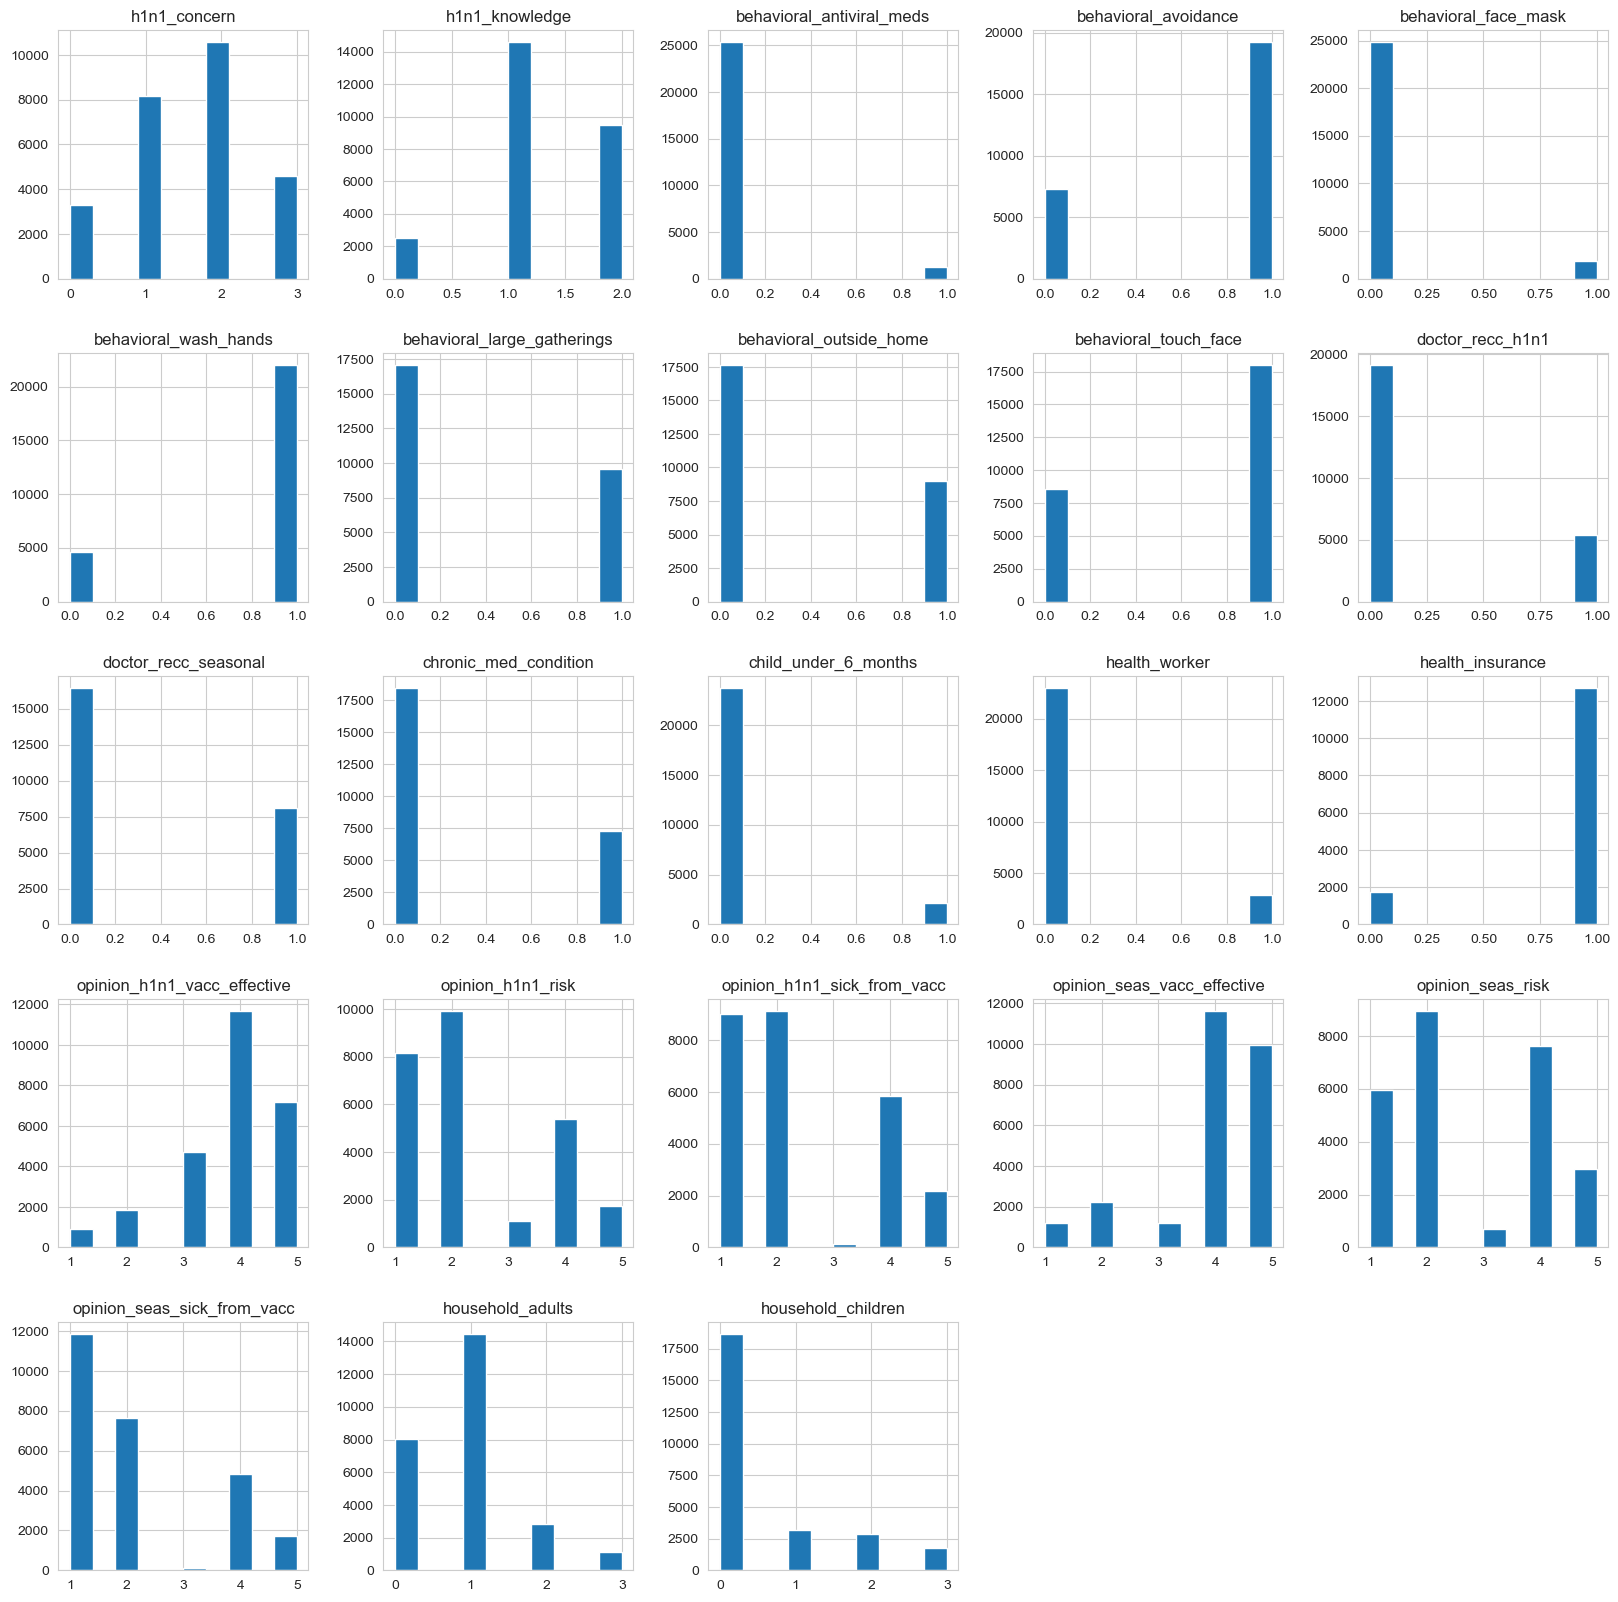

In [17]:
# 使用柱状图显示各个特征的分布情况, 忽略第一个特征respondent_id
df_temp = df_features.iloc[:, 1:]
df_temp.hist(figsize=(20, 20))

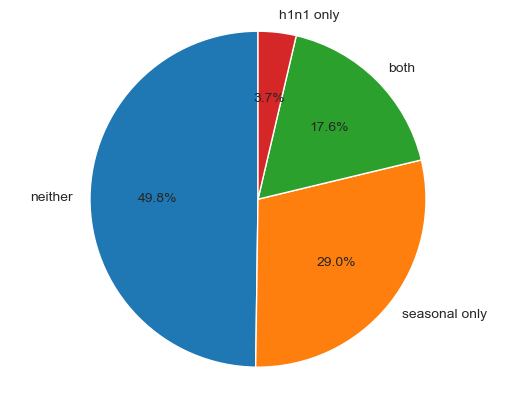

In [18]:
# 饼图显示两个疫苗的接种情况
sizes = df['vaccination_status'].value_counts()
labels = sizes.index
explode = (0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels ,autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
# 保存图片
plt.savefig('./data/vaccine_statue_pie.png')
plt.show()

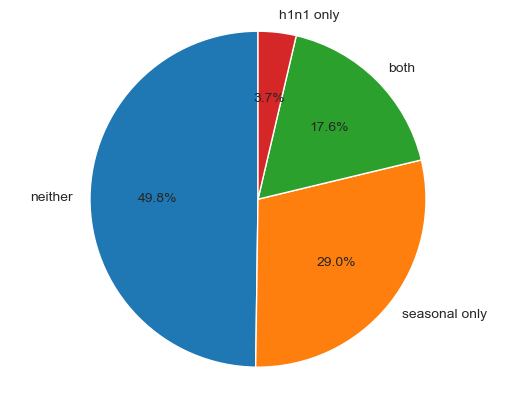

In [19]:
# 显示两个疫苗的接种情况，使用sns的饼图
sizes = df['vaccination_status'].value_counts()
labels = sizes.index
explode = (0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels ,autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.show()

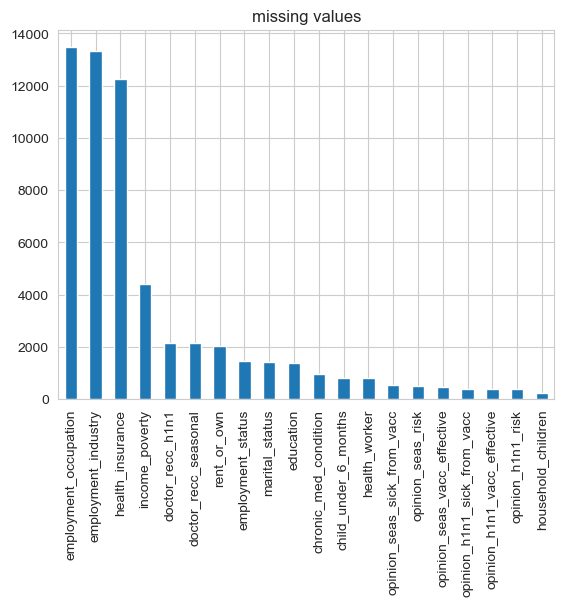

In [20]:
# 用柱状图画出各个特征的缺失值占总数据的百分比，按照缺失值的数量从大到小排序，显示前20个,图片命名为missing values，保存为missing_values.png

df_features.isnull().sum().sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('missing values')
plt.savefig('./data/missing_values.png')

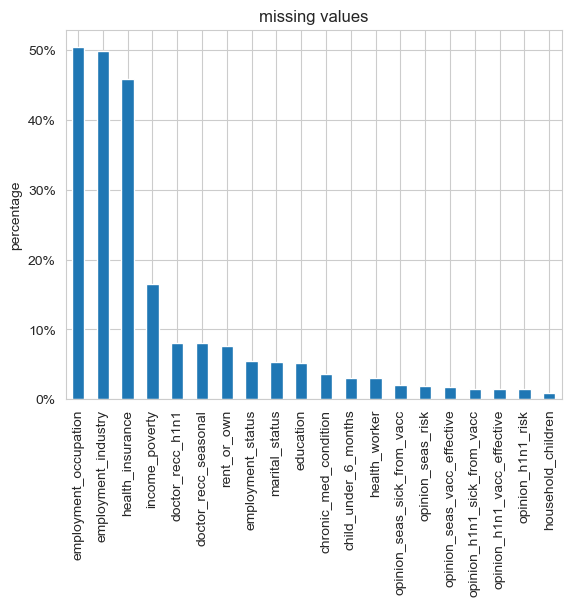

In [21]:
import matplotlib.ticker as mtick
# 计算各个特征的缺失值占总数据的百分比，存为df_missing_values_percentage
df_missing_values_percentage =df_features.isnull().sum().sort_values(ascending=False)[:20]/len(df_features)
# 用柱状图画出，纵坐标显示百分号，命名为missing values，保存为missing_values_percentage.png
df_missing_values_percentage.plot(kind='bar')
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('missing values')
plt.ylabel('percentage')
plt.savefig('./data/missing_values_percentage.png')

In [22]:
# 统计每个特征中的离群值个数
df_temp = df_features.iloc[:, 1:]

outliers = {}
for col in df_temp.columns:
    if df_temp[col].dtype == 'float64' or df_temp[col].dtype == 'int64':
        q1 = df_temp[col].quantile(0.25)
        q3 = df_temp[col].quantile(0.75)
        iqr = q3 - q1
        upper = q3 + 1.5*iqr
        lower = q1 - 1.5*iqr
        outliers[col] = len(df_temp[(df_temp[col] > upper) | (df_temp[col] < lower)])
        # 将离群值结果保存为df数据
df_outliers = pd.DataFrame(outliers, index=['outliers'])
df_outliers

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
outliers,0,0,1301,0,1841,4650,0,0,0,5408,...,2899,1736,0,0,0,3427,0,0,1125,1747


In [23]:
# 用柱状图画出各个特征的离群值的数量，按照离群值的数量从大到小排序，显示前20个
# df_outliers.T.sort_values(by='outliers', ascending=False)[:20].plot(kind='bar')

In [24]:
# # 用sns在每个子图中画出每个数值特征的离群值的情况, 忽略第一个特征respondent_id
# fig, axes = plt.subplots(5, 4, figsize=(20, 20))
# for i, col in enumerate(df_temp.columns):
#     sns.boxplot(data=df_temp, x=col, ax=axes[i//4, i%4])

h1n1_concern : 0
h1n1_knowledge : 0
behavioral_antiviral_meds : 1301
behavioral_avoidance : 0
behavioral_face_mask : 1841
behavioral_wash_hands : 0
behavioral_large_gatherings : 0
behavioral_outside_home : 0
behavioral_touch_face : 0
doctor_recc_h1n1 : 0
doctor_recc_seasonal : 0
chronic_med_condition : 0
child_under_6_months : 2138
health_worker : 0
health_insurance : 0
opinion_h1n1_vacc_effective : 0
opinion_h1n1_risk : 0
opinion_h1n1_sick_from_vacc : 0
opinion_seas_vacc_effective : 0
opinion_seas_risk : 0
opinion_seas_sick_from_vacc : 0
household_adults : 0
household_children : 0


<Axes: >

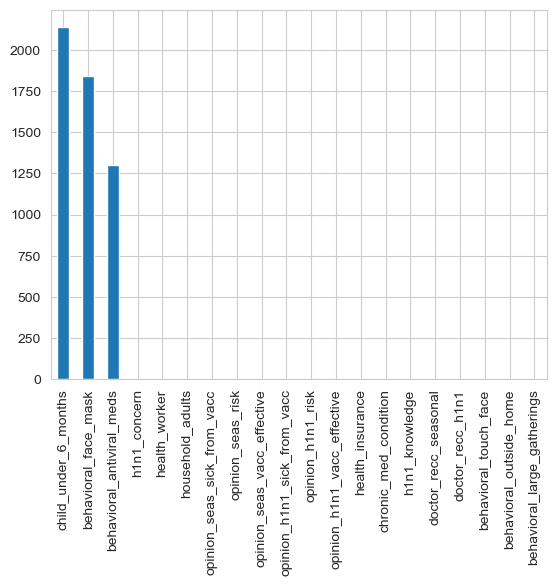

In [25]:
# 使用三杯标注差法，循环统计各个数值型特征的离群值数量
df_features_outliers = df_features.iloc[:, 1:]
for col in df_features_outliers.columns:
    if df_features_outliers[col].dtype == 'float64' or df_features_outliers[col].dtype == 'int64':
        print(col, ':', len(df_features_outliers[(df_features_outliers[col] > df_features_outliers[col].mean() + 3*df_features_outliers[col].std()) | (df_features_outliers[col] < df_features_outliers[col].mean() - 3*df_features_outliers[col].std())]))
        # 将离群值结果保存为df数据
        df_features_outliers.loc[:, col] = (df_features_outliers[col] > df_features_outliers[col].mean() + 3*df_features_outliers[col].std()) | (df_features_outliers[col] < df_features_outliers[col].mean() - 3*df_features_outliers[col].std())
# 忽略字符串型特征
df_features_outliers = df_features_outliers.select_dtypes(exclude=['object'])
df_features_outliers.sum().sort_values(ascending=False)[:20].plot(kind='bar')

In [26]:
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,vaccine,vaccination_status
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0,neither
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1,2,seasonal only
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0,0,neither
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1,2,seasonal only
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0,0,neither
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0,0,neither
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0,0,neither
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1,2,seasonal only
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0,0,neither


In [27]:
# 显示各个特征与'vaccination_status'的相关性
df_temp = df_features.iloc[:, 1:]
df_temp['vaccination_status'] = df['vaccination_status']
df_temp

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,vaccination_status
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,neither
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,seasonal only
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,neither
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,seasonal only
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,neither
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,neither
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,neither
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,seasonal only
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,neither


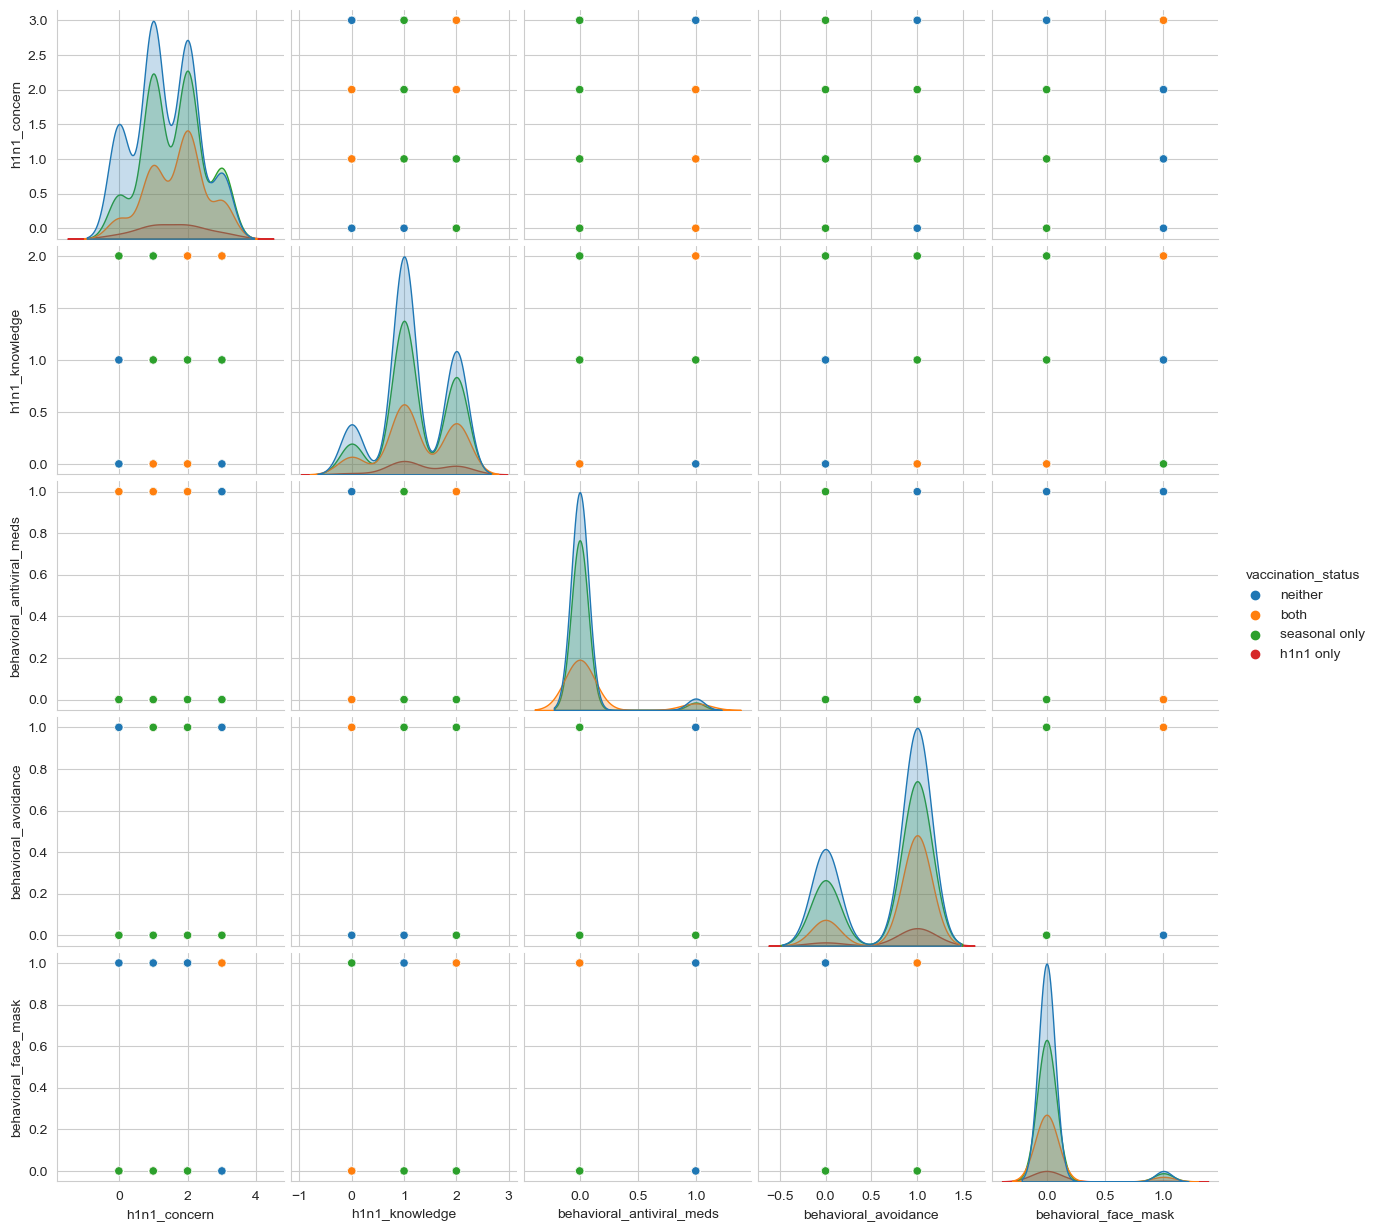

In [28]:
# 用sns.pairplot()方法，随机取500条数据，画出df_temp中随机五个特征与'vaccination_status'的相关性，并保存图片
df_temp = df_temp.sample(500)
sns.pairplot(df_temp, vars=['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask'], hue='vaccination_status')
plt.savefig('./data/pairplot.png')

In [29]:
#将age_group特征转为数值型
df_temp['age_group'] = df_temp['age_group'].map({'18 - 34 Years': 1, '35 - 44 Years': 2, '45 - 54 Years': 3, '55 - 64 Years': 4, '65+ Years': 5})

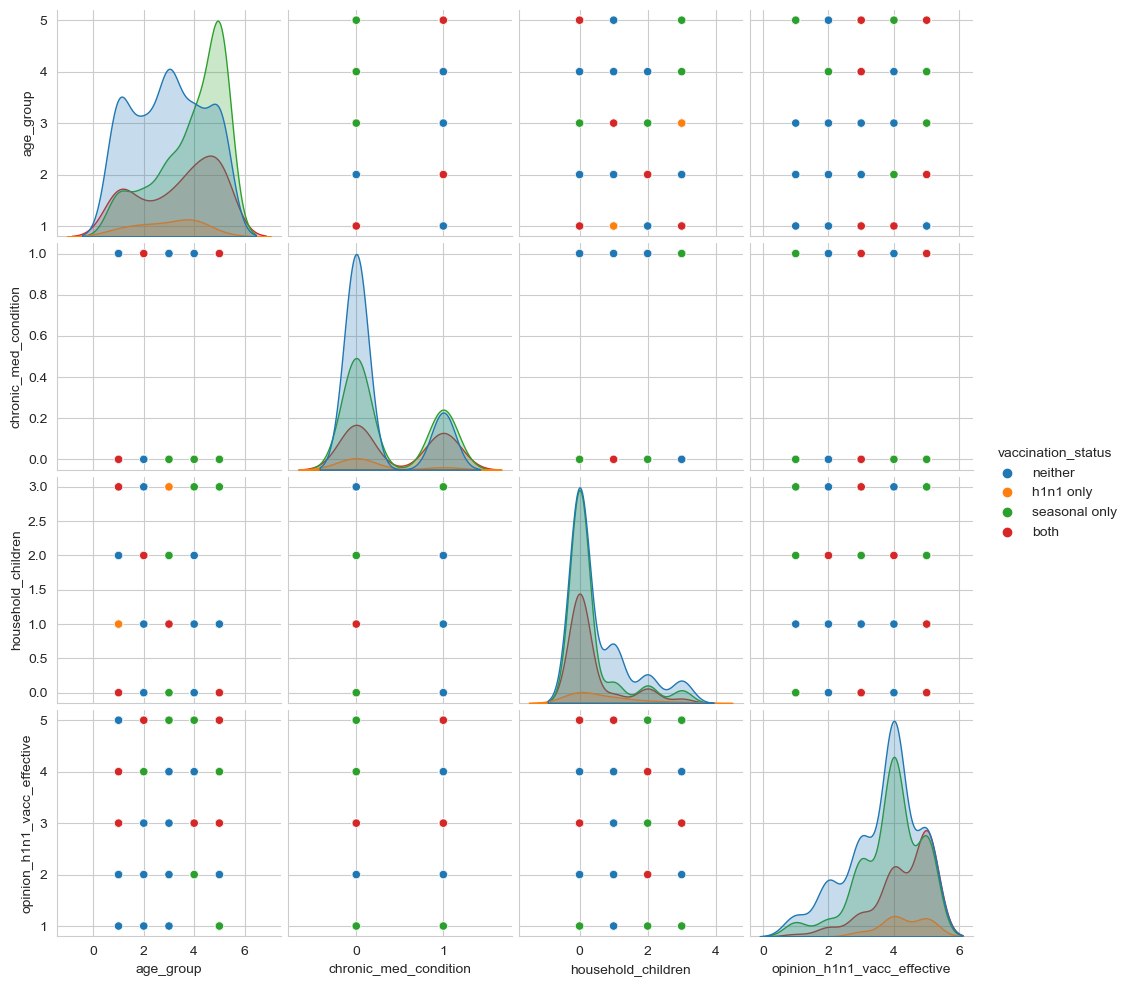

In [30]:
df_temp = df_temp.sample(500)
sns.pairplot(df_temp, vars=['age_group', 'chronic_med_condition', 'household_children', 'opinion_h1n1_vacc_effective'], hue='vaccination_status')
plt.savefig('./data/pairplot.png')